## Overview

Project objective and goals

In this final project, I will be attempting to predict housing prices based on the features of the flat, such as the property size and its proximity to amenities/facilities such as shopping malls or railway stations etc, in a regression task.

Why this is important for me is because I work in the real estate industry, and I am interested to understand more about the housing market, such as what features are important in determining the housing price, so that I am also more aware of when a unit may be under or overpriced. More generally, understanding how features may predict housing prices may also help flat buyers/sellers make more informed decisions before commiting to a transaction.

# Data Description

For my project, I have chosen a Kaggle dataset from https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data/data, focusing on data on prices of Malaysian condonimiums, scraped from a Malaysian housing website that allows housing listings - mudah.my. This would narrow the scope of the regression task a little, as we will only be focusing on a specific housing type - condominiums, instead of other types like terraced houses.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import read_csv

In [2]:
url = 'https://raw.githubusercontent.com/homelyiiiii/DTSA5509/refs/heads/main/houses.csv'
df = pd.read_csv(url)

For this dataset, there are 4,000 rows, with 32 columns. Currently, the dataset shows that there is only one numerical data type ("Ad List"), and the remaining are all categorical. But some of them are in the correct data type, which I will be cleaning later. I will also be removing some variables which are not so relevant.

In [3]:
df

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,~~REAL ADVERTISEMENT~~\nSETIA SKYVILLE@JELUTON...,3,2,1239 sq.ft.,NaN,NaN,102870901,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,...,-,NaN,NaN,NaN,NaN,NaN,RM 1 050 000,NaN,NaN,NaN
3996,345K Renovated Apartment For Sale\nRelau Vista...,3,2,850 sq.ft.,NaN,NaN,103156204,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,...,-,NaN,NaN,NaN,NaN,NaN,RM 345 000,NaN,NaN,NaN
3997,"🔥Now selling at RM 360,000 ONLY !!!! 🔥\n🔥Now s...",3,2,1862 sq.ft.,NaN,NaN,103779905,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,...,-,NaN,NaN,NaN,NaN,NaN,RM 360 000,NaN,NaN,NaN
3998,🔥2024 Ready move in & FREEHOLD Sentul condomin...,4,3,1300 sq.ft.,NaN,NaN,103779892,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,...,-,NaN,NaN,NaN,NaN,NaN,RM 535 000,NaN,NaN,NaN


In [4]:
df.dtypes

,0
description,object
Bedroom,object
Bathroom,object
Property Size,object
Nearby School,object
Nearby Mall,object
Ad List,int64
Category,object
Facilities,object
Building Name,object


Here is a description of what the above data fields are:

*   description: The full (unfiltered) description for the unit listing
*   Ad List: The ID of the listing on the website.
*  Category: The category of the listing.
* Facilities: The facilities that the apartment has
* Building Name: The name of the building.
* Developer: The developer for the building.
* Tenure Type: The type of tenure for the building.
* Address: The address of the building.
* Completion Year: The completion year of the building. If the building is still under construction, this is listed as -.
* Number of Floors: The number of floors in the building.
* Total Units: The total number of units in the building.
* Property Type: The type of property.
* Bedroom: The number of bedrooms in the unit.
* Bathroom: The number of bathrooms in the unit.
* Parking Lot: The number of parking lots assigned to the unit, if any.
* Floor Range: The floor range for the building.
* Property Size: The size of the unit.
* Land Title: The title given to the land. This link explains what land titles are.
* Firm Type: The type of firm who posted the listing.
* Firm Number: The ID of the firm who posted the listing.
* REN Number: The REN number of the firm who posted the listing.
* price: The price of the unit.
* Nearby School/School: If there is a nearby school to the unit, which school it is.
* Park: If there is a nearby park to the unit, which park it is.
* Nearby Railway Station: If there is a nearby railway station to the unit, which railway station it is.
* Bus Stop: If there is a nearby bus stop to the unit, which station it is.
* Nearby Mall/Mall: If there is a nearby mall to the unit, which mall it is.
* Highway: If there is a nearby highway to the unit, which highway it is.

## Data Cleaning

I will now clean up my data. First, I will remove the variables that I do not want, which are not so relevant for my analysis later. This includes description, which is just what was listed on the housing website but this is not needed, Ad List (the ID of the listing of the website), the Firm Number, Firm Type and REN number since they are details of the listing only, as well as other variables I'm not interested in.

In [5]:
df = df.drop(['description', 'Ad List','Firm Type','Firm Number','REN Number','Category', 'Facilities','Building Name','Address','Developer','Property Type','Land Title'], axis=1)

Recall that the price variable, which should be a numerical feature, was listed as an object. The data type is an object, with values "RM 340000" for example. We will have to convert it to a numerical data type. Same for the property size variable.

In [6]:
df['price'] = (
    df['price']
    .str.replace('RM', '', case=False)
    .str.replace(',', '')
    .str.strip()
    .str.replace(' ', '')  # Remove internal spaces
    .astype(float)
)

In [7]:
df['Property Size'] = df['Property Size'].str.replace('sq.ft.', '', case=False).str.strip().astype(int)

In [8]:
df['Bedroom'] = df['Bedroom'].replace('-', '0').astype(int)
df['Bathroom']=df['Bathroom'].replace('-', '0').astype(int)
df['Parking Lot']=df['Parking Lot'].replace('-', '0').astype(int)

In [9]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Tenure Type,Completion Year,# of Floors,Total Units,Parking Lot,Floor Range,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,2,1000,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,Freehold,-,-,-,2,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,340000.0,NaN,NaN,NaN
1,3,2,980,NaN,NaN,Freehold,-,-,-,1,Low,NaN,NaN,NaN,NaN,NaN,250000.0,NaN,NaN,NaN
2,3,2,1000,NaN,NaN,Freehold,2007,13,445,1,Medium,NaN,NaN,NaN,NaN,NaN,230000.0,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,3,1,592,NaN,NaN,Leasehold,-,-,-,1,-,NaN,NaN,NaN,NaN,NaN,158000.0,NaN,NaN,NaN
4,1,1,467,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,Freehold,-,43,956,0,Low,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,305000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,NaN,NaN,Freehold,2021,33,550,2,Low,NaN,NaN,NaN,NaN,NaN,1050000.0,NaN,NaN,NaN
3996,3,2,850,NaN,NaN,Freehold,2008,29,-,1,High,NaN,NaN,NaN,NaN,NaN,345000.0,NaN,NaN,NaN
3997,3,2,1862,NaN,NaN,Freehold,-,-,-,0,Low,NaN,NaN,NaN,NaN,NaN,360000.0,NaN,NaN,NaN
3998,4,3,1300,NaN,NaN,Freehold,2023,44,684,3,Medium,NaN,NaN,NaN,NaN,NaN,535000.0,NaN,NaN,NaN


From the dataframe, we can see that there are missing values in the "nearby school", "nearby mall" etc columns. Examining the data, there will only be values if there is a school or mall, and blank if there are none nearby. For the purpose of analysis, we would only need to know if there are malls or schools nearby, without needing to know the exact names of the malls/schools. Hence we will change the values to just 1 for "yes" if there are amenities nearby, and 0 for "no" if there are none. I'm using a numerical value for easier analysis later.

In [10]:
columns_to_change = [
    'Nearby School', 'Nearby Mall', 'Bus Stop', 'Mall',
    'Park', 'School', 'Hospital', 'Highway',
    'Nearby Railway Station', 'Railway Station'
]

for col in columns_to_change:
    df[col] = df[col].fillna('0').apply(lambda x: '1' if x != '0' else '0')

In [11]:
#Check the resulting dataframe
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Tenure Type,Completion Year,# of Floors,Total Units,Parking Lot,Floor Range,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,2,1000,1,1,Freehold,-,-,-,2,-,1,1,1,1,1,340000.0,0,0,0
1,3,2,980,0,0,Freehold,-,-,-,1,Low,0,0,0,0,0,250000.0,0,0,0
2,3,2,1000,0,0,Freehold,2007,13,445,1,Medium,0,0,0,0,0,230000.0,1,0,0
3,3,1,592,0,0,Leasehold,-,-,-,1,-,0,0,0,0,0,158000.0,0,0,0
4,1,1,467,1,1,Freehold,-,43,956,0,Low,1,1,1,1,1,305000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,Freehold,2021,33,550,2,Low,0,0,0,0,0,1050000.0,0,0,0
3996,3,2,850,0,0,Freehold,2008,29,-,1,High,0,0,0,0,0,345000.0,0,0,0
3997,3,2,1862,0,0,Freehold,-,-,-,0,Low,0,0,0,0,0,360000.0,0,0,0
3998,4,3,1300,0,0,Freehold,2023,44,684,3,Medium,0,0,0,0,0,535000.0,0,0,0


Now essentially, the "Nearby Mall/School" etc columns will be the same as the "Mall/School". We only need one of them. So I will drop the remaining columns, to make it easier to deal with.

In [12]:
df = df.drop(['Mall', 'School','Railway Station'], axis=1)

In [13]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Tenure Type,Completion Year,# of Floors,Total Units,Parking Lot,Floor Range,Bus Stop,Park,Hospital,price,Highway,Nearby Railway Station
0,4,2,1000,1,1,Freehold,-,-,-,2,-,1,1,1,340000.0,0,0
1,3,2,980,0,0,Freehold,-,-,-,1,Low,0,0,0,250000.0,0,0
2,3,2,1000,0,0,Freehold,2007,13,445,1,Medium,0,0,0,230000.0,1,0
3,3,1,592,0,0,Leasehold,-,-,-,1,-,0,0,0,158000.0,0,0
4,1,1,467,1,1,Freehold,-,43,956,0,Low,1,1,1,305000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,Freehold,2021,33,550,2,Low,0,0,0,1050000.0,0,0
3996,3,2,850,0,0,Freehold,2008,29,-,1,High,0,0,0,345000.0,0,0
3997,3,2,1862,0,0,Freehold,-,-,-,0,Low,0,0,0,360000.0,0,0
3998,4,3,1300,0,0,Freehold,2023,44,684,3,Medium,0,0,0,535000.0,0,0


I also noticed that there are many empty cells for completion year, # of floors and total units etc. As I am less concerned about these attributes (which relate to the total building, and not the specific unit details), I will remove the columns too.

In [18]:
df = df.drop(['Completion Year', '# of Floors','Total Units'], axis=1)

In [20]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Tenure Type,Parking Lot,Floor Range,Bus Stop,Park,Hospital,price,Highway,Nearby Railway Station
0,4,2,1000,1,1,Freehold,2,-,1,1,1,340000.0,0,0
1,3,2,980,0,0,Freehold,1,Low,0,0,0,250000.0,0,0
2,3,2,1000,0,0,Freehold,1,Medium,0,0,0,230000.0,1,0
3,3,1,592,0,0,Leasehold,1,-,0,0,0,158000.0,0,0
4,1,1,467,1,1,Freehold,0,Low,1,1,1,305000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,Freehold,2,Low,0,0,0,1050000.0,0,0
3996,3,2,850,0,0,Freehold,1,High,0,0,0,345000.0,0,0
3997,3,2,1862,0,0,Freehold,0,Low,0,0,0,360000.0,0,0
3998,4,3,1300,0,0,Freehold,3,Medium,0,0,0,535000.0,0,0


In [22]:
# Re-label the floor range
floor_range = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply the mapping to the 'Floor Range' column
df['Floor Range'] = df['Floor Range'].replace(floor_range)

#Fill the "NaN" values with the mean
df['Floor Range'] = pd.to_numeric(df['Floor Range'], errors='coerce')
df['Floor Range'] = df['Floor Range'].fillna(df['Floor Range'].mean())

# Exploratory Data Analysis

Now that the data is clean, we can start our exploratory data analysis! I am plotting some charts based on my own hunch that property size and number of bedrooms should affect the price of the unit. Let's see if I'm right!

In [19]:
df.describe()

,Bedroom,Bathroom,Property Size,Parking Lot,price
count,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,2.916500,2.019250,1035.049000,1.047500,4.218269e+05
std,0.693288,0.608253,2012.250439,0.906614,3.286249e+05
min,0.000000,0.000000,1.000000,0.000000,3.800000e+04
25%,3.000000,2.000000,750.000000,0.000000,2.500000e+05
50%,3.000000,2.000000,900.000000,1.000000,3.500000e+05
75%,3.000000,2.000000,1120.000000,2.000000,4.900000e+05
max,10.000000,8.000000,122774.000000,10.000000,6.016000e+06


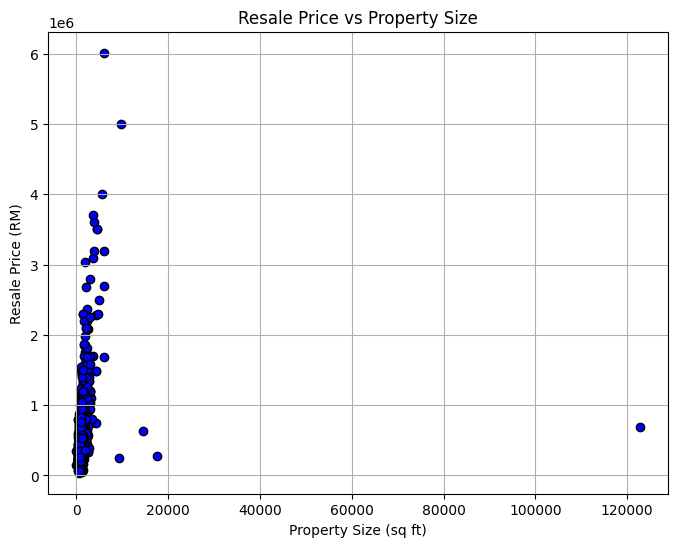

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Property Size'], df['price'], color='blue', edgecolor='black')
plt.title('Resale Price vs Property Size')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Resale Price (RM)')
plt.grid(True)
plt.show()

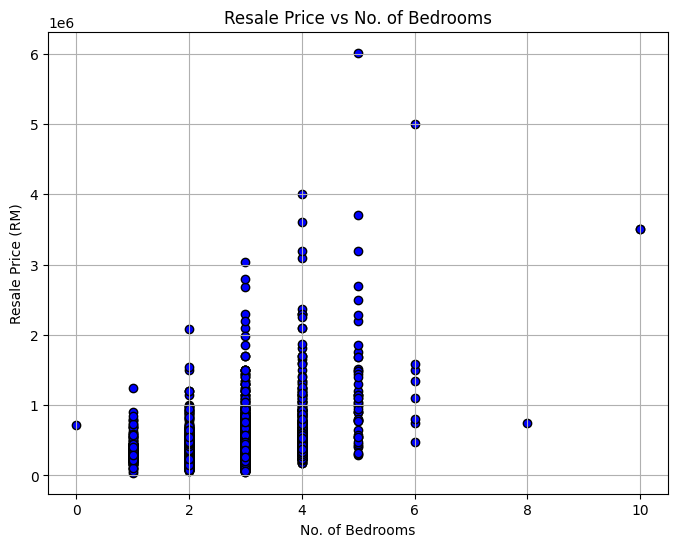

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Bedroom'], df['price'], color='blue', edgecolor='black')
plt.title('Resale Price vs No. of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Resale Price (RM)')
plt.grid(True)
plt.show()

#Models

Using different machine learning methods to select top features to include in the regression model.

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Assuming X is your feature matrix and y is the target variable
X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, columns=['Tenure Type'], drop_first=True)


# Select the top 5 features based on the F-test
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(X, y)

# Get the selected feature columns
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Bedroom', 'Bathroom', 'Property Size', 'Parking Lot', 'Floor Range',
       'Tenure Type_Leasehold'],
      dtype='object')


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance scores
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Feature  Importance
2            Property Size    0.707616
1                 Bathroom    0.076132
5              Parking Lot    0.073804
0                  Bedroom    0.047408
6              Floor Range    0.038048
12   Tenure Type_Leasehold    0.018798
9                 Hospital    0.006575
4              Nearby Mall    0.006052
8                     Park    0.005546
10                 Highway    0.005388
11  Nearby Railway Station    0.005022
3            Nearby School    0.004978
7                 Bus Stop    0.004633


However, based on my feature importance from Random Forest, it seems like other the property size really affects price of the unit. I have thus only used property size in my model. Below is my code for training the model.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into train and test
resale_p = df['price'].values
X = df[['Property Size']].values

X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=0.2, random_state=1108)

# scale the data
scaler = StandardScaler()

# the use of fit is to find the mean and variance
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from keras import layers, optimizers

def linreg(X_train, y_train, X_test, y_test):
    model_results = {}
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Linear Regression'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] =metrics.mean_squared_error(y_test, y_pred)
    model_results['explained variance score'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

def decisiontree(X_train, y_train, X_test, y_test):
    model_results = {}
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Decision Tree'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['explained variance score'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results



model_linreg = linreg(X_train, y_train, X_test, y_test)
model_decision = decisiontree(X_train, y_train, X_test, y_test)

df = pd.DataFrame([model_linreg, model_decision])

#Results and Analysis

In [30]:
print(df)

               model            mae           mse  explained variance score
0  Linear Regression  190584.371502  1.162258e+11                  0.050452
1      Decision Tree  123458.601864  5.194516e+10                  0.577173


My findings showed that the decision tree model is better at predicting housing prices, with a higher explained variance score, and a lower mean absolute error/mean squared error.

However, the explain variance score is also not very high (1 being the highest), probably due to the limitations of my study as follows:

- I had to remove quite a few variables because I felt they were not relevant. On hindsight, perhaps I should have tried to include them to see if they could fit the model and provide better results.
- In addition, perhaps there isn't sufficient data of units that are next to schools/malls/railway stations/parks etc, for us to determine if the location next to these amenities affect the selling prices of the flat. I think it would be better if I had a more substantial dataset with sufficient data on flats nearby and flats not nearby, for a more accurate analysis.

Perhaps though it could be just that property size plays an overwhelming role in determining the selling price of the flat, that everything else is quite secondary and the effects cannot really be detected.

#Discussion and Conclusion

I had expected that proximity to amenities like schools, malls or railway stations would influence the selling price of the unit, although my feature selection results seem to show otherwise.

In addition, apart from property size, there could be other factors not considered in this study that may influence housing prices, such as macroeconomic factors and global climate. In addition, I also missed out on having sufficient data on the available facilities, which could have also been included in the model, suggesting scope for future study.

Ultimately, it shows that the housing market is quite complex, and just one feature of property size is insufficient, although it may be quite significant on its own.